# Exploratory Data Analysis

In [16]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns


### DataSet:
The wheather data we are dealing with contains six columns:
- date YYYY-MM-DD
- precipitation: water vapor that falls from clouds in the form of drizzle, rain, sleet, snow etc...
- temp_max : Maximum Temperature
- temp_min : Minimum Temperature
- wind : Wind speed
- weather (**The Target varieable**):  weathers types


In [17]:
df = pd.read_csv("../input/seattle-weather.csv")
df

,date,precipitation,temp_max,temp_min,wind,weather
0,1/1/2012,0.0,12.8,5.0,4.7,drizzle
1,1/2/2012,10.9,10.6,2.8,4.5,rain
2,1/3/2012,0.8,11.7,7.2,2.3,rain
3,1/4/2012,20.3,12.2,5.6,4.7,rain
4,1/5/2012,1.3,8.9,2.8,6.1,rain
...,...,...,...,...,...,...
1486,1/26/2016,6.0,5.6,-1.0,3.5,NaN
1487,1/27/2016,7.0,NaN,-2.1,3.5,sat
1488,1/28/2016,1.0,5.6,NaN,3.5,sun
1489,1/29/2016,2.0,NaN,-2.1,3.5,mon


Exploring the datatype of each column:

### Initial Data Exploration:

In [18]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1491 entries, 0 to 1490
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1490 non-null   object 
 1   precipitation  1487 non-null   float64
 2   temp_max       1482 non-null   float64
 3   temp_min       1480 non-null   float64
 4   wind           1489 non-null   float64
 5   weather        1486 non-null   object 
dtypes: float64(4), object(2)
memory usage: 70.0+ KB


We can see that Date column must be converted into datetime data type.

In [19]:
df['date']=pd.to_datetime(df['date'])

### Checking for missing values:

In [20]:
# df.isnull().sum()
import numpy as np
df.describe()

,precipitation,temp_max,temp_min,wind
count,1487.000000,1482.000000,1480.000000,1489.000000
mean,3.046738,16.285493,8.070473,3.246004
std,6.633643,7.409134,5.334579,1.424667
min,0.000000,-1.600000,-50.000000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,3.000000,21.700000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


**Hence missing values is less than 5% of total values, it can be deleted without affecting the distribution.**

In [21]:
df.dropna(inplace=True)
df.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

Analyzing unique values in each column:

In [22]:
df.nunique()

date             1461
precipitation     111
temp_max           67
temp_min           55
wind               79
weather             5
dtype: int64

## Visualizing dataset.

### **Distribution of The target variable** (weather column)
 has five unique values: drizzle, rain, sum, snow, fog. Here is the frequency of each category.
- From the visualization we can notice that sun and rain are the most repeated. On the other hand, snow is the least.

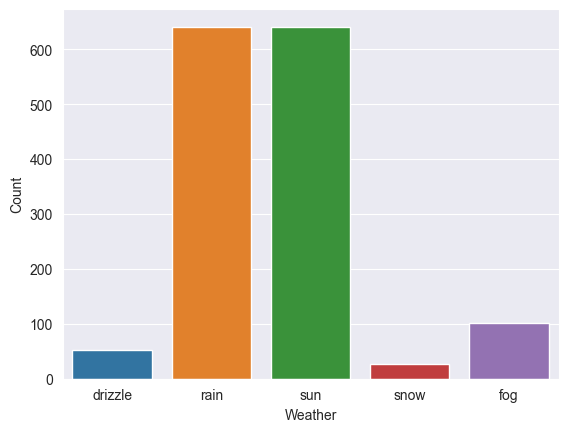

In [23]:
sns.countplot(x='weather',data=df)
plt.xlabel('Weather')
plt.ylabel('Count')
plt.show()

### **Pairplot** 
 visualizes the relationship between two variables, with one variable plotted on the x-axis and the other variable plotted on the y-axis.

By showing all pairwise relationships in a single plot, pairplots can help to quickly identify patterns and relationships between variables, including any linear or non-linear associations, correlations, or clustering.



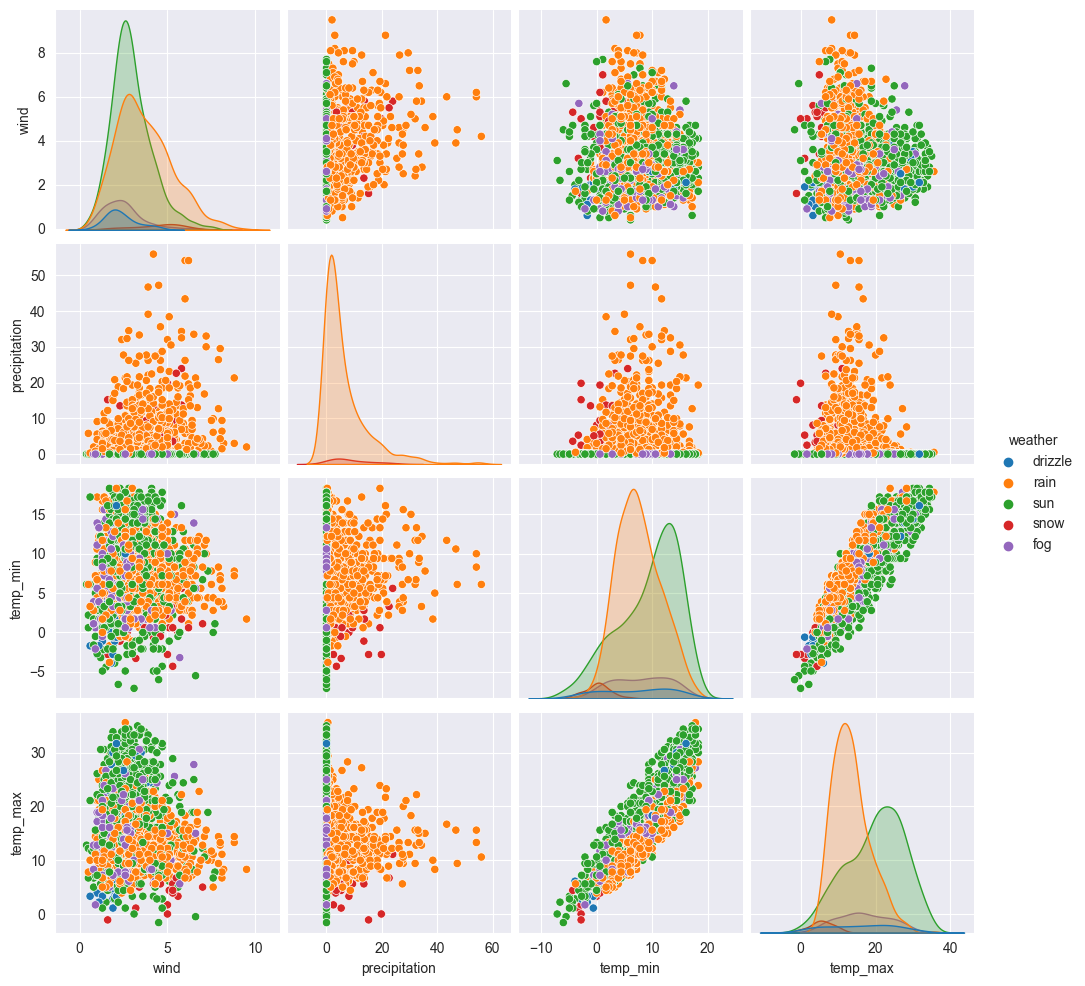

In [24]:
sns.pairplot(df[['wind','precipitation','temp_min','temp_max','weather']],hue='weather')
plt.show()

### Visualizing attributes with respect to the target:


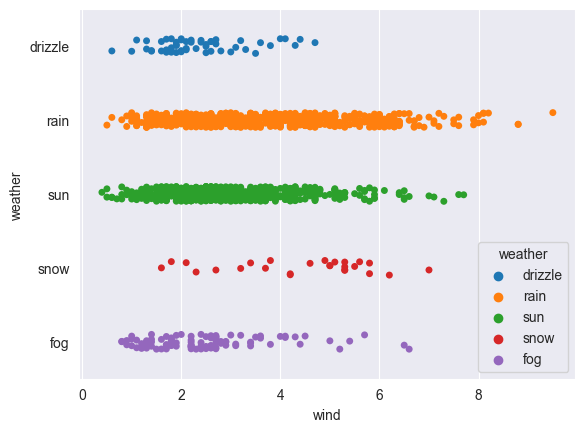

In [25]:
sns.stripplot(data=df,y='weather',x='wind',hue='weather')
plt.show()

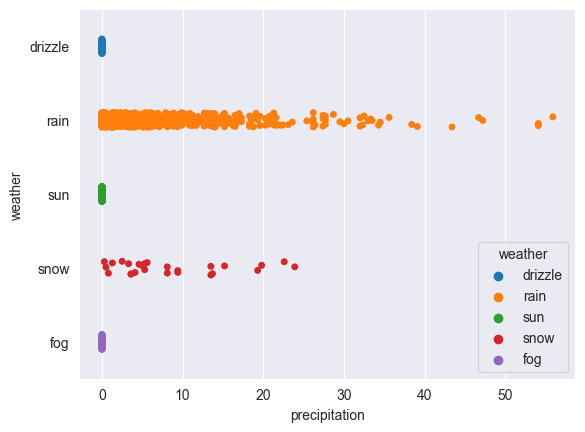

In [26]:
sns.stripplot(data=df,y='weather',x='precipitation',hue='weather')
plt.show()

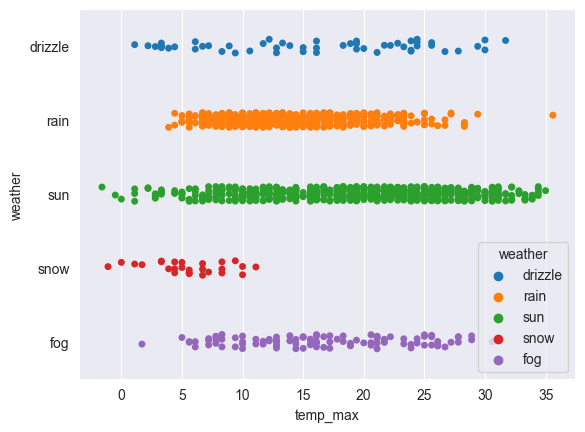

In [27]:
sns.stripplot(data=df,y='weather',x='temp_max',hue='weather')
plt.show()

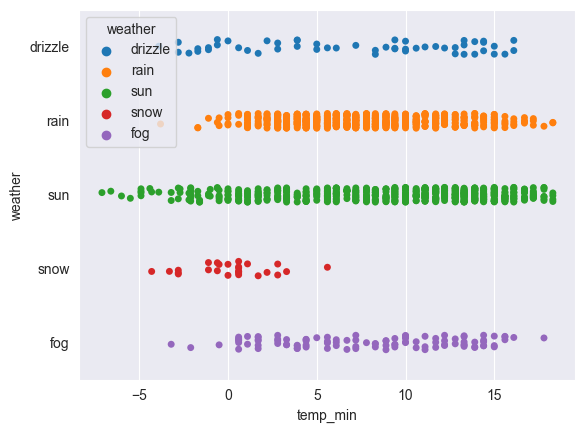

In [28]:
sns.stripplot(data=df,y='weather',x='temp_min',hue='weather')
plt.show()

### Time Series Analysis
Time series analysis is a statistical technique used to analyze data that varies over time. We will temperature and wind over time.




<AxesSubplot: xlabel='date', ylabel='wind'>

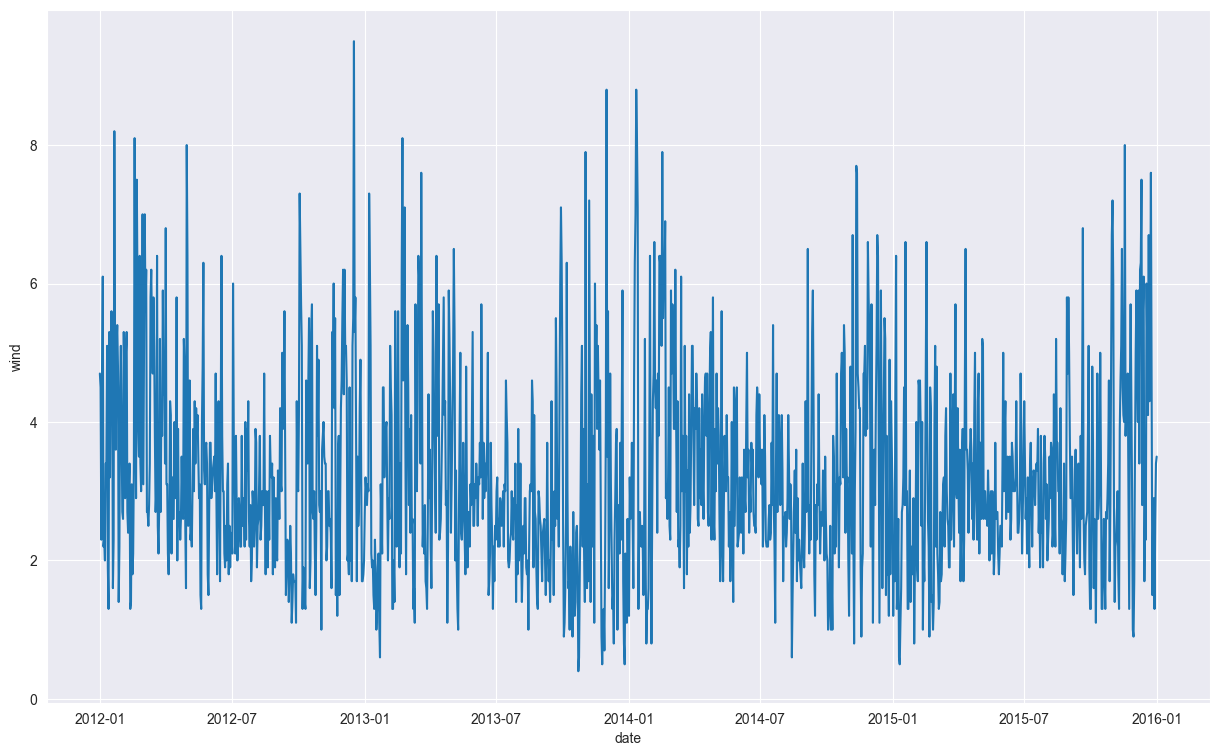

In [29]:
plt.figure(figsize=(15,9))
sns.lineplot(df,x='date',y='wind')

<AxesSubplot: xlabel='date', ylabel='temp_min'>

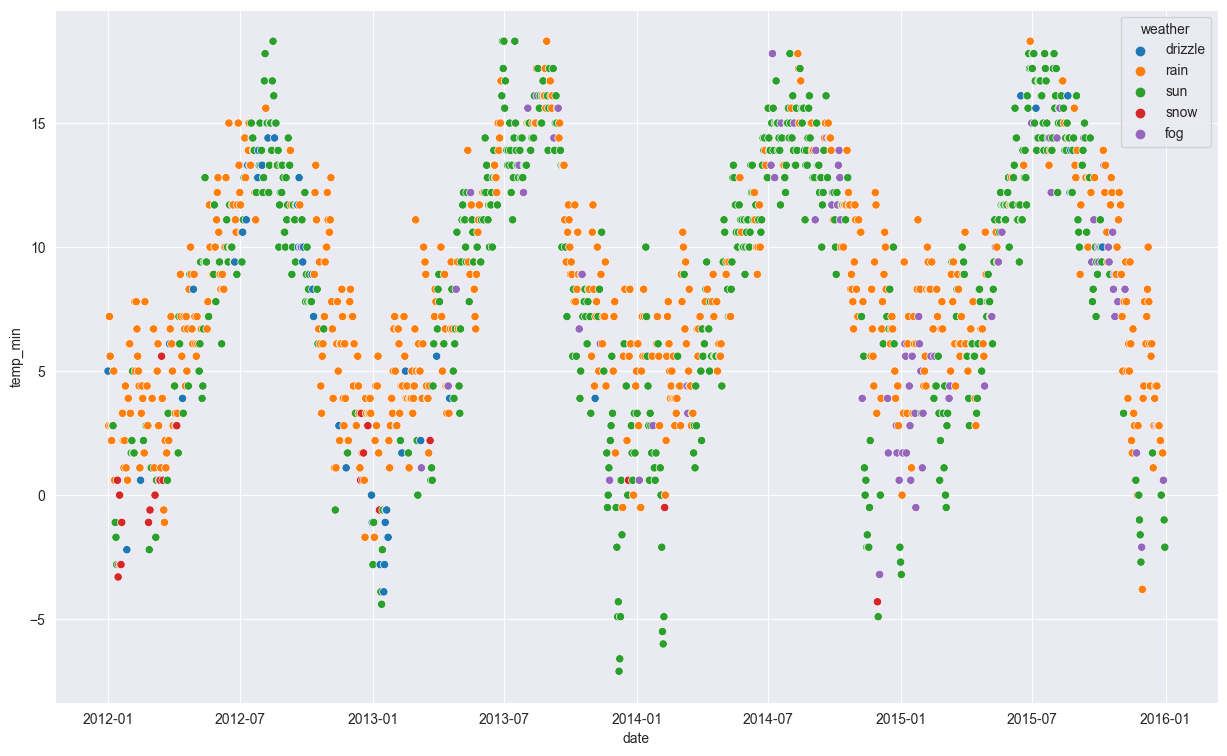

In [30]:
plt.figure(figsize=(15,9))
sns.scatterplot(df,x='date',y='temp_min',hue='weather')

<AxesSubplot: xlabel='date', ylabel='temp_max'>

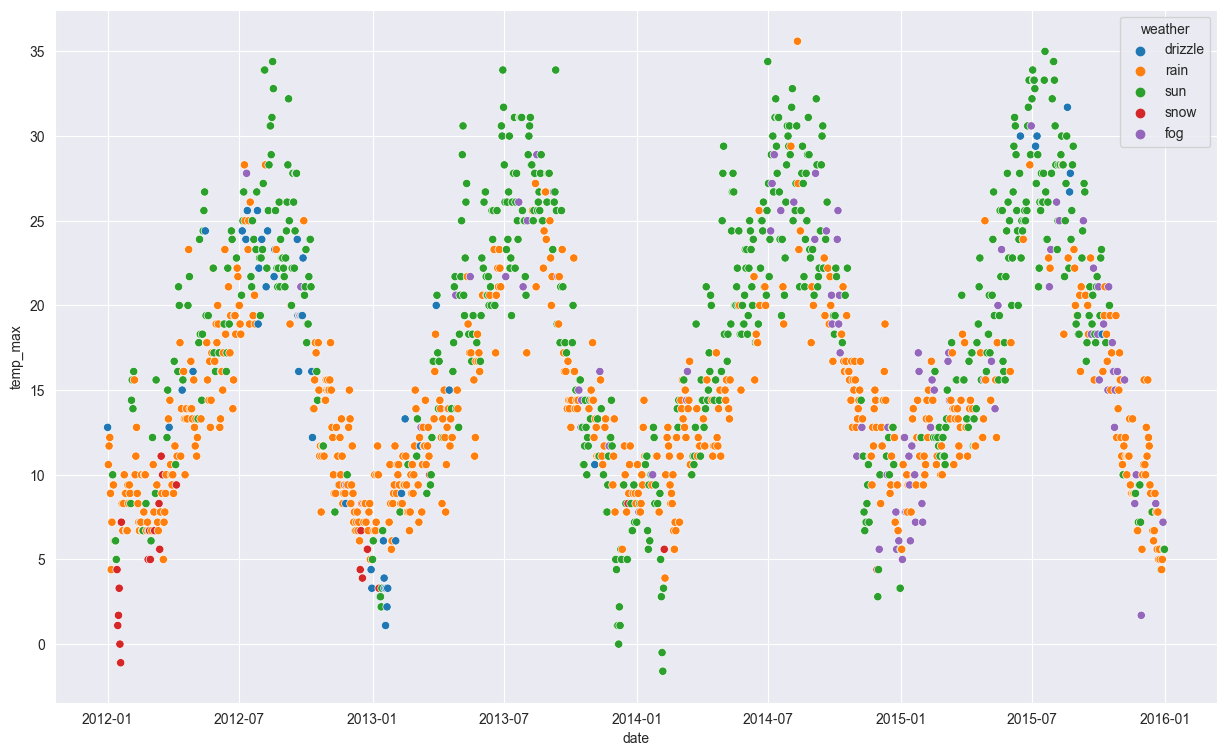

In [31]:
plt.figure(figsize=(15,9))
sns.scatterplot(df,x='date',y='temp_max',hue='weather')

# Feature Engineering

## Target Variable Encoding
**Transforming each unique categorical value into a unique numerical label**

The fit_transform() method of the LabelEncoder class fits the encoder to the unique values in the weather column and transforms the categorical values into numerical labels.

In [32]:
from sklearn.preprocessing import LabelEncoder
df['weather']=LabelEncoder().fit_transform(df['weather'])

**Droping data feature**

The resulting DataFrame will have the same rows as the original DataFrame df, but without the date column.

In [33]:
from sklearn.decomposition import PCA
df['year']=df['date'].dt.year
df['month']=df['date'].dt.month
df['day']=df['date'].dt.day
df['PC_date']=PCA(n_components=1).fit_transform(df[['year','month','day']])

In [34]:
df = df.drop(['year','month','day','date'],axis=1)

In [35]:
df.columns

Index(['precipitation', 'temp_max', 'temp_min', 'wind', 'weather', 'PC_date'], dtype='object')

# Splitting Dataset


**Splitting a dataset into two variables x and y.**

- x represents the features (independent variables).
- y represents the target variable (dependent variable) that we want to predict.

The idea is to use the features x to predict the target variable y.

In [36]:
# df=df.drop('date',axis=1)
x = df.drop('weather',axis=1)
y = df['weather']

**Splitting the data into training and testing sets**

The train_test_split function from sklearn.model_selection module to split the data into training and testing sets.

***The train_test_split() function takes:***
- x: the features (independent variables) to be used for training and testing the model.
- y: the target variable (dependent variable) that we want to predict.
- test_size: 25% of the data will be used for testing.

***The train_test_split() function returns four variables:***
- X_train: the features to be used for training the model.
- X_test: the features to be used for testing the model.
- Y_train: the target variable to be used for training the model.
- Y_test: the target variable to be used for testing the model.

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

# Feature Scaling

**Standardize Data**

Standardize X_train and X_test data using the StandardScaler class from the sklearn.preprocessing module.

***The fit_transform()*** method is used to standardize the X_train data, which computes the mean and standard deviation of the data and scales it accordingly.

***The transform()*** method is used to transform the X_test data using the mean and standard deviation computed from X_train.

In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Classification Algorithms

## 1- Logistic Regression Model
LogisticRegression is a machine learning algorithm used for classification problems. It models the probability of the binary output variable (i.e., the response variable) given the values of the input variables (i.e., the features) using a logistic function.

In [39]:
from sklearn.linear_model import LogisticRegression
lrmodel = LogisticRegression(random_state = 0)
lrmodel.fit(X_train, Y_train)

LogisticRegression(random_state=0)

**Now we will test the model and store the predictied values from it**

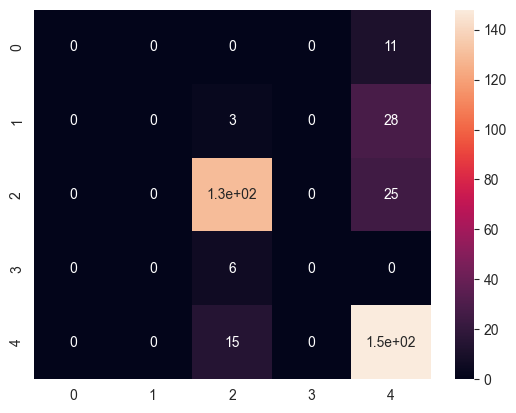

In [40]:
Y_pred = lrmodel.predict(X_test)
from sklearn.metrics import confusion_matrix
conMat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conMat,annot=True)
plt.show()

In [41]:
from sklearn.metrics import accuracy_score
ac1 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {ac1}")

Accuracy score: 0.7595628415300546


## 2- SVM Model
Support Vector Machine (SVM) is a popular machine learning algorithm used for classification and regression problems. In classification problems, SVM tries to find the optimal hyperplane that separates the different classes in the feature space. The hyperplane is chosen such that the distance between the hyperplane and the nearest data points from each class (called support vectors) is maximized. This distance is known as the margin, and SVM is sometimes referred to as a maximum margin classifier.

In [42]:
from sklearn.svm import SVC
svcModel = SVC( random_state = 0)
svcModel.fit(X_train, Y_train)

SVC(random_state=0)

**Now we will test the model and store the predictied values from it**

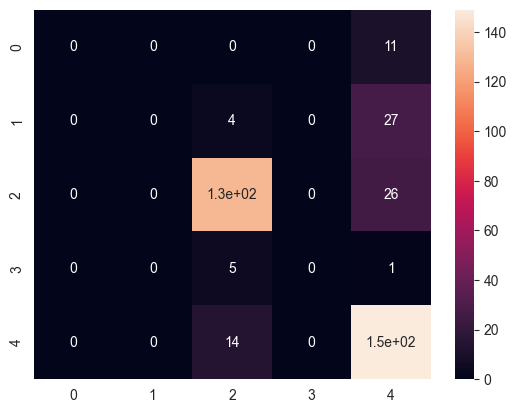

In [43]:
Y_pred = svcModel.predict(X_test)
Y_pred
conMat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conMat,annot=True)
plt.show()

In [44]:
ac2 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {ac2}")

Accuracy score: 0.7595628415300546


## 3- K-NN Model
K-Nearest Neighbors (K-NN) is a popular machine learning algorithm used for classification and regression problems. In classification problems, K-NN assigns the class label of an unlabeled data point based on the class labels of its k-nearest neighbors in the feature space. The value of k is a hyperparameter that needs to be specified by the user.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, Y_train)

KNeighborsClassifier()

**Now we will test the model and store the predictied values from it**

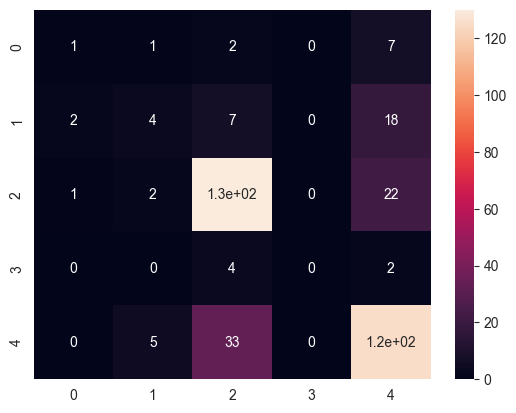

In [46]:
Y_pred = classifier.predict(X_test)
Y_pred
# Comparing results with Y_test by Confusion Matrix
conMat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conMat,annot=True)
plt.show()

In [47]:
ac3 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {ac3}")

Accuracy score: 0.7103825136612022


## 4- Naive Bayes

In [48]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

 **Now we will test the module and store the predictied values from it**

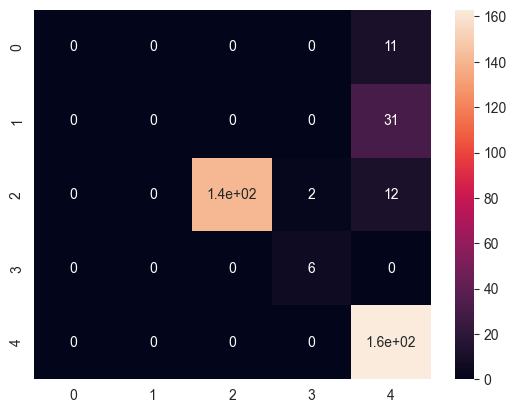

In [49]:

Y_pred = classifier.predict(X_test)
conMat = confusion_matrix(Y_test, Y_pred)
sns.heatmap(conMat,annot=True)
plt.show()

In [50]:
ac4 = accuracy_score(Y_test, Y_pred)
print(f"Accuracy score: {ac4}")

Accuracy score: 0.8469945355191257


### 5- XGBoost Classifier

In [51]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
xgModel=XGBClassifier()
xgModel.fit(X_train,Y_train)




XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [52]:
prediction=xgModel.predict(X_test)
acc5=accuracy_score(prediction,Y_test)

# Conclusion
Naive Bayes Algorithm achieved the highest accuracy= 84.7 %

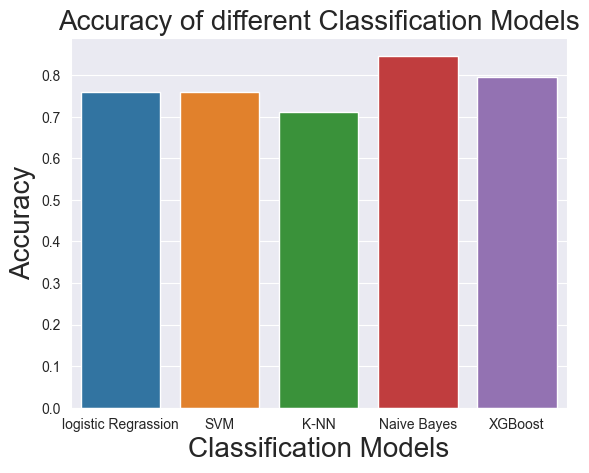

<Figure size 2200x800 with 0 Axes>

In [53]:
modelNames=['logistic Regrassion','SVM','K-NN','Naive Bayes','XGBoost']
accuracies=np.array([ac1,ac2,ac3,ac4,acc5])
sns.barplot(x=modelNames,y=accuracies)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.figure(figsize=(22,8))

plt.show()
